# MK test on data

In [1]:
#import general packages
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



#import analysis packages
import ipympl
from scipy.signal import periodogram 

# import state space models package
import statsmodels.api as sm

#import custom functions
from custom_functions import data_split, UCM 
importlib.reload(UCM)
importlib.reload(data_split)

# set plotting to unique style
sb.set_theme(style="ticks")
sb.set_context("paper")
%matplotlib widget

In [2]:
# Template for each site
site_template = {
    "raw": None,
    "train_period":[],
    "train": None,
    "p_val":None,
    "z_val":None,
    "overall_slope":None,
    "seasonal_slope":{}
}


# List of sites
sites = ["Toreadora", "Virgen", "Chirimachay", "OPNC", "Balzay", "Zhurucay"]

# List of variables
variables = ["Temperature", "Precipitation"]

# Create the main dictionary
analysis_overview= {var: {site: site_template.copy() for site in sites} for var in variables}


### Temperature data

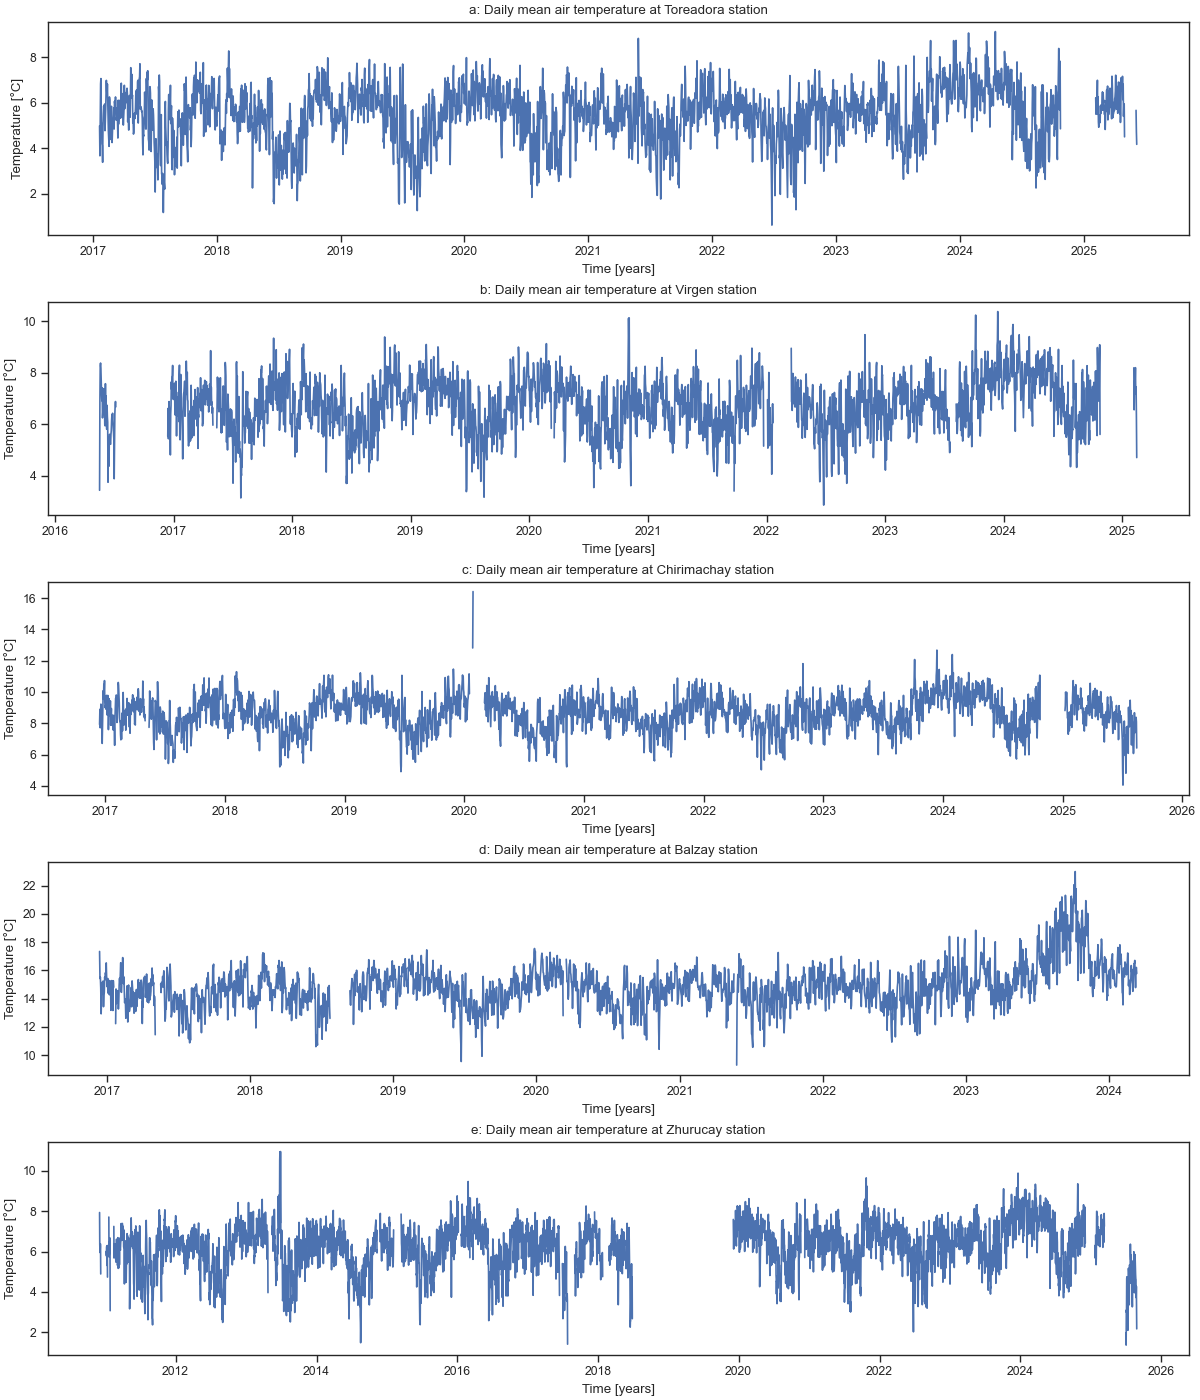

In [3]:
# Load data, extract relevant col, convert index to datetime, append to dict
Zhur_T_day = pd.read_csv(f"../../data/Zhurucay/Metereological/Zhurucay_daily_mean_AirTC_Avg.csv")
Zhur_T_day['TIMESTAMP'] = pd.to_datetime(Zhur_T_day['TIMESTAMP'])
Zhur_T_day.set_index('TIMESTAMP', inplace=True)
analysis_overview['Temperature']['Zhurucay']['raw'] = Zhur_T_day

Balzay_T_data = pd.read_csv("../../data/Quinuas/Metereological/Balzay_daily_mean_AirTC_Avg.csv", sep=",", engine="python", on_bad_lines="skip")
Balzay_T_data['TIMESTAMP'] = pd.to_datetime(Balzay_T_data['TIMESTAMP'], errors='coerce')
Balzay_T_data.set_index('TIMESTAMP', inplace=True)
analysis_overview['Temperature']['Balzay']['raw'] = Balzay_T_data

Chirimachay_T_data = pd.read_csv("../../data/Quinuas/Metereological/Chirimachay_daily_mean_AirTC_Avg.csv")
Chirimachay_T_data['TIMESTAMP'] = pd.to_datetime(Chirimachay_T_data['TIMESTAMP'], errors='coerce')
Chirimachay_T_data.set_index('TIMESTAMP', inplace=True)
analysis_overview['Temperature']['Chirimachay']['raw'] = Chirimachay_T_data

Toreadora_T_data = pd.read_csv("../../data/Quinuas/Metereological/Toreadora_daily_mean_AirTC_Avg.csv")
Toreadora_T_data['TIMESTAMP'] = pd.to_datetime(Toreadora_T_data['TIMESTAMP'], errors='coerce')
Toreadora_T_data.set_index('TIMESTAMP', inplace=True)
analysis_overview['Temperature']['Toreadora']['raw'] = Toreadora_T_data
                         
Virgen_T_data = pd.read_csv("../../data/Quinuas/Metereological/Virgen_daily_mean_AirTC_Avg.csv")
Virgen_T_data['TIMESTAMP'] = pd.to_datetime(Virgen_T_data['TIMESTAMP'], errors='coerce')
Virgen_T_data.set_index('TIMESTAMP', inplace=True)
analysis_overview['Temperature']['Virgen']['raw'] = Virgen_T_data


# PLot temperature data
fig,ax = plt.subplots(nrows=5,figsize=(12,14),layout="constrained")
#fig.suptitle('Daily mean air temperature at Quinuas stations', fontsize=16)

ax[0].plot(Toreadora_T_data['AirTC_Avg'], label='Toreadora')
ax[0].title.set_text('a: Daily mean air temperature at Toreadora station')
ax[0].set_ylabel('Temperature [°C]')
ax[0].set_xlabel('Time [years]')

ax[1].plot(Virgen_T_data['AirTC_Avg'], label='Virgen')
ax[1].title.set_text('b: Daily mean air temperature at Virgen station')
ax[1].set_ylabel('Temperature [°C]')
ax[1].set_xlabel('Time [years]')

ax[2].plot(Chirimachay_T_data['AirTC_Avg'], label='Virgen')
ax[2].title.set_text('c: Daily mean air temperature at Chirimachay station')
ax[2].set_ylabel('Temperature [°C]')   
ax[2].set_xlabel('Time [years]')

ax[3].plot(Balzay_T_data['AirTC_Avg'], label='Balzay')
ax[3].title.set_text('d: Daily mean air temperature at Balzay station')
ax[3].set_ylabel('Temperature [°C]')
ax[3].set_xlabel('Time [years]')

ax[4].plot(Zhur_T_day['AirTC_Avg'], label='Zhurucay')
ax[4].title.set_text('e: Daily mean air temperature at Zhurucay station')
ax[4].set_ylabel('Temperature [°C]')
ax[4].set_xlabel('Time [years]')

fig.tight_layout
plt.show()

### Precipitation data

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_24804\2868883389.py:7: DtypeWarning: Columns (2,4,6,7,9,11,14,15,18,20,22,24,25,26,29,30,31,32,34,36,40,42,45,47,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  Balzay_P_data = pd.read_csv("../../data/Quinuas/Balzay_full.csv")


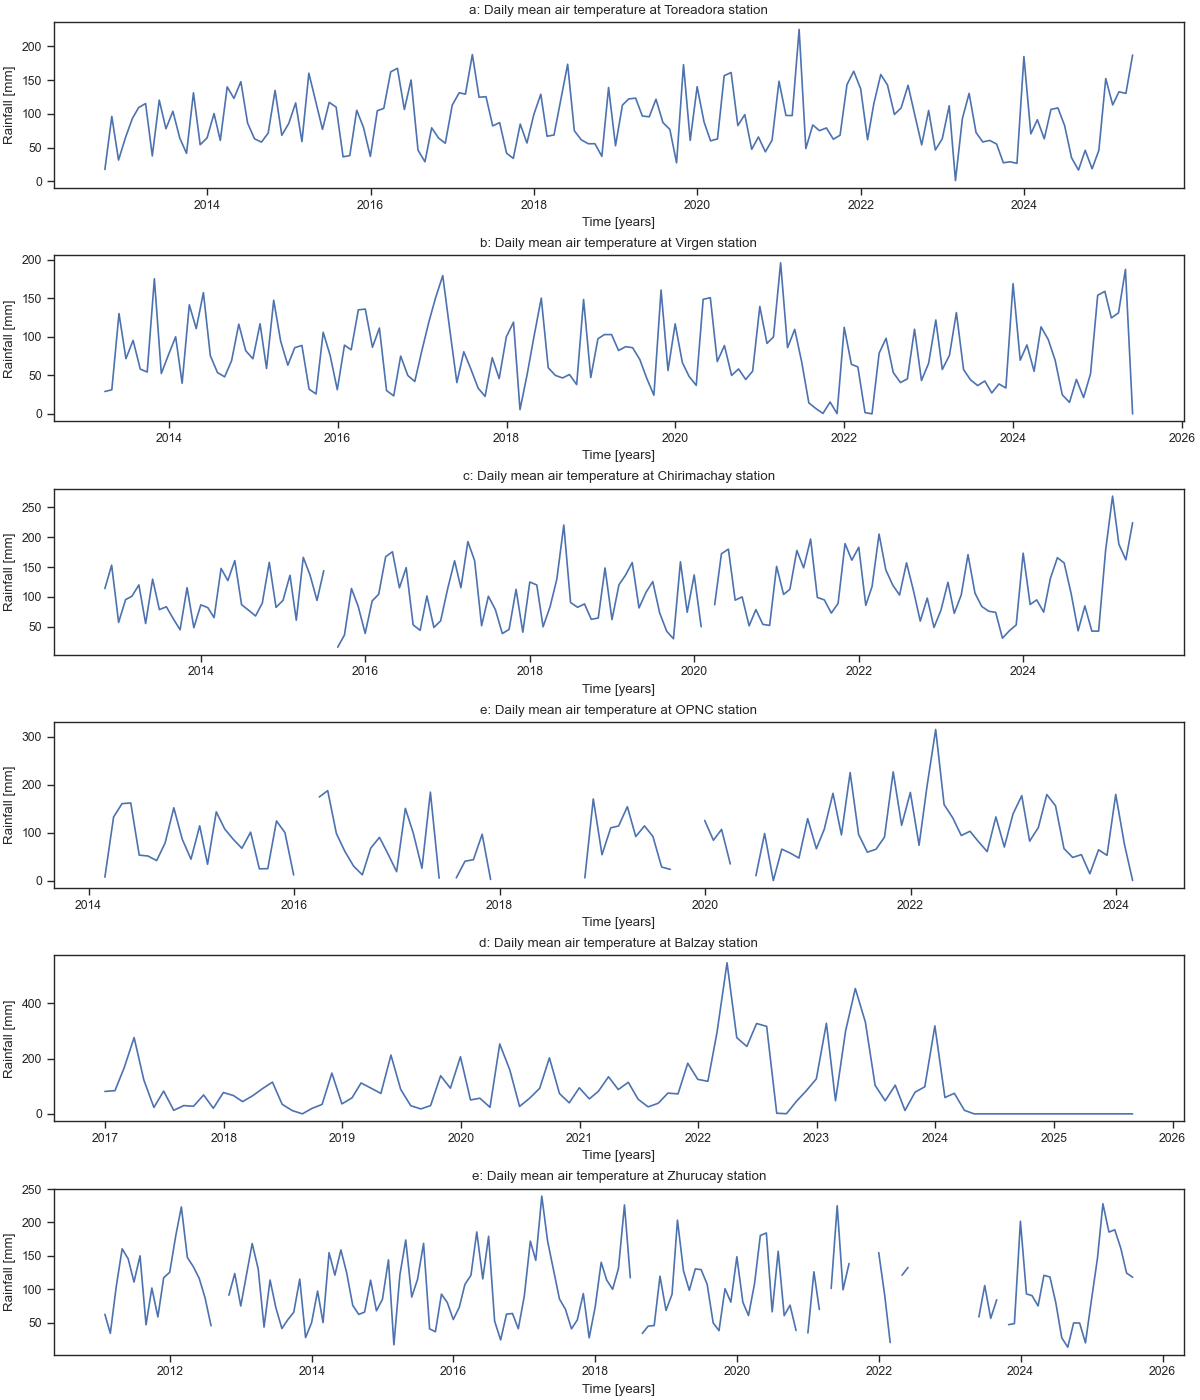

In [4]:
Zhur_P_day = pd.read_csv(f"../../data/Zhurucay/Precipitation/Unidos_Zhu_PT13_Diario_05_12_2010_17_07_2025.csv")
Zhur_P_day['Fecha'] = pd.to_datetime(Zhur_P_day['Fecha'])
Zhur_P_data = Zhur_P_day.resample('ME', on='Fecha').sum()
Zhur_P_data[Zhur_P_data['Valor_mm_day']<10] = np.nan
analysis_overview['Precipitation']['Zhurucay']['raw'] = Zhur_P_data

Balzay_P_data = pd.read_csv("../../data/Quinuas/Balzay_full.csv")
Balzay_P_data = Balzay_P_data[['TIMESTAMP', 'Rain_mm_Tot']]
Balzay_P_data.loc[Balzay_P_data['Rain_mm_Tot'] > 2, 'Rain_mm_Tot']  = np.nan
Balzay_P_data['TIMESTAMP'] = pd.to_datetime(Balzay_P_data['TIMESTAMP'], errors='coerce')
Balzay_P_data = Balzay_P_data.resample('ME', on='TIMESTAMP').sum()
#Balzay_P_data['Rain_mm_Tot'] = Balzay_P_data['Rain_mm_Tot'].replace(0, np.nan)
analysis_overview['Precipitation']['Balzay']['raw'] = Balzay_P_data

Chirimachay_P_data = pd.read_csv("../../data/Quinuas/Precipitation/Chirimachay/Datos_unidos_corregidos_Chirimachay_Texas_5min_05_2025.csv")
Chirimachay_P_data['Fecha'] = pd.to_datetime(Chirimachay_P_data['Fecha'], errors='coerce')
Chirimachay_P_data = Chirimachay_P_data.resample('ME', on='Fecha').sum() 
Chirimachay_P_data['tip_corrected_mm'] = Chirimachay_P_data['tip_corrected_mm'].replace(0, np.nan)
analysis_overview['Precipitation']['Chirimachay']['raw'] = Chirimachay_P_data

Toreadora_P_data = pd.read_csv("../../data/Quinuas/Precipitation/Toreadora/Datos_unidos_corregidos_Toreadora_Texas_5min_05_2025.csv")
Toreadora_P_data['Fecha'] = pd.to_datetime(Toreadora_P_data['Fecha'], errors='coerce')
Toreadora_P_data = Toreadora_P_data.resample('ME', on='Fecha').sum()   
Toreadora_P_data['tip_corrected_mm'] = Toreadora_P_data['tip_corrected_mm'].replace(0, np.nan)
analysis_overview['Precipitation']['Toreadora']['raw'] = Toreadora_P_data

Virgen_P_data = pd.read_csv("../../data/Quinuas/Precipitation/Virgen/Datos_unidos_corregidos_Virgen_Texas_5min_05_2025.csv")
Virgen_P_data['Fecha'] = pd.to_datetime(Virgen_P_data['Fecha'],errors='coerce')
Virgen_P_data = Virgen_P_data.resample('ME', on='Fecha').sum()
Virgen_P_data['tip_corrected_mm'] = Virgen_P_data['tip_corrected_mm'].replace(0, np.nan)
analysis_overview['Precipitation']['Virgen']['raw'] = Virgen_P_data

OPNC_P_data = pd.read_csv("../../data/Quinuas/Precipitation/OPNC/Datos_unidos_corregidos_OPNC_5min.csv")
OPNC_P_data['Fecha'] = pd.to_datetime(OPNC_P_data['Fecha'],errors='coerce')
OPNC_P_data = OPNC_P_data.resample('ME', on='Fecha').sum()
OPNC_P_data['tip_corrected_mm'] = OPNC_P_data['tip_corrected_mm'].replace(0, np.nan)
analysis_overview['Precipitation']['OPNC']['raw'] = OPNC_P_data

# PLot temperature data
fig,ax = plt.subplots(nrows=6,figsize=(12,14),layout="constrained")
#fig.suptitle('Daily mean air temperature at Quinuas stations', fontsize=16)

ax[0].plot(Toreadora_P_data['tip_corrected_mm'], label='Toreadora')
ax[0].title.set_text('a: Daily mean air temperature at Toreadora station')
ax[0].set_ylabel('Rainfall [mm]')
ax[0].set_xlabel('Time [years]')

ax[1].plot(Virgen_P_data['tip_corrected_mm'], label='Virgen')
ax[1].title.set_text('b: Daily mean air temperature at Virgen station')
ax[1].set_ylabel('Rainfall [mm]')
ax[1].set_xlabel('Time [years]')

ax[2].plot(Chirimachay_P_data['tip_corrected_mm'], label='Virgen')
ax[2].title.set_text('c: Daily mean air temperature at Chirimachay station')
ax[2].set_ylabel('Rainfall [mm]')   
ax[2].set_xlabel('Time [years]')

ax[3].plot(OPNC_P_data['tip_corrected_mm'], label='OPNC')
ax[3].title.set_text('e: Daily mean air temperature at OPNC station')
ax[3].set_ylabel('Rainfall [mm]')
ax[3].set_xlabel('Time [years]')

ax[4].plot(Balzay_P_data['Rain_mm_Tot'], label='Balzay')
ax[4].title.set_text('d: Daily mean air temperature at Balzay station')
ax[4].set_ylabel('Rainfall [mm]')
ax[4].set_xlabel('Time [years]')

ax[5].plot(Zhur_P_data['Valor_mm_day'], label='Zhurucay')
ax[5].title.set_text('e: Daily mean air temperature at Zhurucay station')
ax[5].set_ylabel('Rainfall [mm]')
ax[5].set_xlabel('Time [years]')

fig.tight_layout
plt.show()

In [10]:
variables

['Temperature', 'Precipitation']

In [12]:
import pymannkendall as pmk
from statsmodels.tsa.seasonal import STL

Temperature_res = []
Precip_res = []

for var in variables:
    print(f"Variable: {var}")
    for site in sites:
        print(f"    site: {site}")
        data = analysis_overview[var][site]['raw']

        # Skip if data is None
        if data is None:
            print(f"    Skipping site {site}: no data")
            continue
        
        # Skip if data is empty
        if data.empty:
            print(f"    Skipping site {site}: empty data")
            continue

        start_year = data.index.min().year
        end_year = data.index.max().year

        # Step 0: Only keep full years 
        trimmed = data.loc[f'{start_year+1}-01-01':f'{end_year-1}-12-31']

        # Step 1: remove invalid indices
        valid_mask = pd.to_datetime(trimmed.index, errors='coerce').notna()
        data = trimmed[valid_mask]

        # Step 2: Ensure Datetime index
        data.index = pd.to_datetime(data.index)

        # Step 3: Remove seasonal cycle: subtract each month's mean
        if var=='Precipitation':
            period = 12
        else:
            period=365

        data_stl = data.dropna()
        stl = STL(data_stl, period=period)  # assuming daily data with yearly seasonality
        res = stl.fit()
        data_deseasoned = data - res.seasonal

        # Step 4: Aggregate daily -> monthly averages for seasonal MK
        if var == 'Temperature':
            monthly_data = data.resample('ME').mean()
            monthly_values = monthly_data.values
        else:
            monthly_values = data

        monthly_data_deseasoned = data_deseasoned.resample('ME').mean()
        monthly_values_deseasoned = monthly_data_deseasoned.values

        period = 12  # months per year

        # Step 5: Run Seasonal Mann-Kendall with slope
        try:
            seasonal_result = pmk.seasonal_test(monthly_values, period=period)
            seasonal_trend = seasonal_result.trend
            seasonal_h = seasonal_result.h
            seasonal_p = seasonal_result.p
            seasonal_tau = seasonal_result.Tau
            seasonal_slope = seasonal_result.slope  # This is the Sen's slope (vol/vol per month)
        except Exception:
            seasonal_trend = None
            seasonal_p = None
            seasonal_tau = None
            seasonal_slope = None

        # Step 6: Run Robust MK (Hamed-Rao) on raw daily data
        try:
            robust_result = pmk.hamed_rao_modification_test(data.values)
            robust_trend = robust_result.trend
            robust_h = robust_result.h
            robust_p = robust_result.p
            robust_tau = robust_result.Tau
            robust_slope = robust_result.slope
        except Exception:
            robust_trend = None
            robust_p = None
            robust_tau = None
            robust_slope = None

        # Step 7: Append results to list
        if var == "Temperature":
            Temperature_res.append({
                'Site': site,
                'Seasonal_MK_Trend': seasonal_trend,
                'Seasonal_MK_h':seasonal_h,
                'Seasonal_MK_p': seasonal_p,
                'Seasonal_MK_Tau': seasonal_tau,
                'Seasonal_MK_Slope': seasonal_slope,        # include Sen's slope
                'Robust_MK_Trend': robust_trend,
                'Robust_MK_h':robust_h,
                'Robust_MK_p': robust_p,
                'Robust_MK_Tau': robust_tau,
                'Robust_MK_Slope': robust_slope
            })
        else:
            Precip_res.append({
                'Site': site,
                'Seasonal_MK_Trend': seasonal_trend,
                'Seasonal_MK_h':seasonal_h,
                'Seasonal_MK_p': seasonal_p,
                'Seasonal_MK_Tau': seasonal_tau,
                'Seasonal_MK_Slope': seasonal_slope,        # include Sen's slope
                'Robust_MK_Trend': robust_trend,
                'Robust_MK_h':robust_h,
                'Robust_MK_p': robust_p,
                'Robust_MK_Tau': robust_tau,
                'Robust_MK_Slope': robust_slope
            })  

# Step 8: create Dataframe and save to .csv
Temperature_res = pd.DataFrame(Temperature_res)   
Temperature_res.to_csv("../../../Python/output/TS_temp/SMK_validation.csv")
display(Temperature_res)

Precip_res = pd.DataFrame(Precip_res)
Precip_res.to_csv("../../../Python/output/TS_precip/SMK_validation.csv")
display(Precip_res)
# results_df = pd.concat([Temperature_res, Precip_res], keys=['Temperature','Precipitation'])    
# display(results_df)

Variable: Temperature
    site: Toreadora
    site: Virgen
    site: Chirimachay
    site: OPNC
    Skipping site OPNC: no data
    site: Balzay
    site: Zhurucay
Variable: Precipitation
    site: Toreadora
    site: Virgen
    site: Chirimachay
    site: OPNC
    site: Balzay
    site: Zhurucay


,Site,Seasonal_MK_Trend,Seasonal_MK_h,Seasonal_MK_p,Seasonal_MK_Tau,Seasonal_MK_Slope,Robust_MK_Trend,Robust_MK_h,Robust_MK_p,Robust_MK_Tau,Robust_MK_Slope
0,Toreadora,increasing,True,1.497247e-03,0.300000,0.097138,no trend,False,0.059986,0.081850,0.000215
1,Virgen,increasing,True,9.135637e-03,0.225397,0.071586,no trend,False,0.098596,0.080884,0.000157
2,Chirimachay,increasing,True,2.544909e-02,0.193651,0.060009,no trend,False,0.288499,0.042870,0.000089
3,Balzay,increasing,True,5.055827e-04,0.325203,0.139293,increasing,True,0.008650,0.171291,0.000470
4,Zhurucay,increasing,True,1.616559e-08,0.352601,0.054656,increasing,True,0.000008,0.141818,0.000149


,Site,Seasonal_MK_Trend,Seasonal_MK_h,Seasonal_MK_p,Seasonal_MK_Tau,Seasonal_MK_Slope,Robust_MK_Trend,Robust_MK_h,Robust_MK_p,Robust_MK_Tau,Robust_MK_Slope
0,Toreadora,no trend,False,0.127451,-0.098485,-1.322501,no trend,False,1.350765e-01,-0.080614,-0.120933
1,Virgen,decreasing,True,0.032764,-0.145455,-1.836753,no trend,False,5.257927e-02,-0.138099,-0.226486
2,Chirimachay,no trend,False,0.140800,0.096104,1.213586,no trend,False,6.107485e-01,0.037659,0.061876
3,OPNC,increasing,True,0.026277,0.197279,4.991412,no trend,False,1.526303e-01,0.119351,0.332630
4,Balzay,no trend,False,0.943020,0.008929,0.417500,no trend,False,8.041058e-01,-0.026096,-0.083177
5,Zhurucay,decreasing,True,0.049351,-0.124274,-1.583270,decreasing,True,5.654774e-07,-0.097678,-0.154484


Combine all SMK tests

- Temperature, Precipitation and Soil Moisture

In [11]:
Temp_MK = pd.read_csv("../../../Python/output/TS_temp/SMK_validation.csv", index_col=0)
Precip_MK = pd.read_csv("../../../Python/output/TS_precip/SMK_validation.csv", index_col=0)
SM_MK = pd.read_csv("../../../Python/output/TS_SM/SMK_results_validation.csv", index_col=0)

MK_df = pd.concat([Temp_MK,Precip_MK,SM_MK], keys= ['Temperature','Precipitation','Soil Moisture'])
MK_df.to_csv("../../../Python/output/MK_combined.csv")
display(MK_df)

Site Seasonal_MK_Trend Seasonal_MK_h  Seasonal_MK_p  \
Temperature   0    Toreadora        increasing          True   1.497247e-03   
              1       Virgen        increasing          True   9.135637e-03   
              2  Chirimachay        increasing          True   2.544909e-02   
              3       Balzay        increasing          True   5.055827e-04   
              4     Zhurucay        increasing          True   1.616559e-08   
Precipitation 0    Toreadora          no trend         False   1.274514e-01   
              1       Virgen        decreasing          True   3.276377e-02   
              2  Chirimachay          no trend         False   1.407995e-01   
              3         OPNC        increasing          True   2.627713e-02   
              4       Balzay          no trend         False   9.430204e-01   
              5     Zhurucay        decreasing          True   4.935078e-02   
Soil Moisture 0     Zhurucay          no trend           NaN   7.864924e-01   
              1      Quinuas        decreasing           NaN   8.356523e-04   
              2   6120191830        increasing           NaN   1.277131e-05   
              3   6120208780          no trend           NaN   7.578381e-02   
              4   6120254390          no trend           NaN   5.794984e-02   
              5   6120288400        decreasing           NaN   4.294588e-04   
              6   6121039290        decreasing           NaN   1.576995e-03   
              7   6121047290          no trend           NaN   4.888000e-01   
              8   6121051790          no trend           NaN   7.864924e-01   
              9   6121064220        decreasing           NaN   5.497824e-12   

                 Seasonal_MK_Tau  Seasonal_MK_Slope Robust_MK_Trend  \
Temperature   0         0.300000           0.097138        no trend   
              1         0.225397           0.071586        no trend   
              2         0.193651           0.060009        no trend   
              3         0.325203           0.139293      increasing   
              4         0.352601           0.054656      increasing   
Precipitation 0        -0.098485          -1.322501        no trend   
              1        -0.145455          -1.836753        no trend   
              2         0.096104           1.213586        no trend   
              3         0.197279           4.991412        no trend   
              4         0.008929           0.417500        no trend   
              5        -0.124274          -1.583270      decreasing   
Soil Moisture 0        -0.023148          -0.000118        no trend   
              1        -0.259259          -0.001782      decreasing   
              2         0.337963           0.003521      increasing   
              3        -0.138889          -0.000685      decreasing   
              4        -0.148148          -0.000745      decreasing   
              5        -0.273148          -0.002389      decreasing   
              6        -0.245370          -0.001434      decreasing   
              7        -0.055556          -0.000340        no trend   
              8        -0.023148          -0.000115        no trend   
              9        -0.532407          -0.003322      decreasing   

                Robust_MK_h   Robust_MK_p  Robust_MK_Tau  Robust_MK_Slope  
Temperature   0       False  5.998587e-02       0.081850         0.000215  
              1       False  9.859595e-02       0.080884         0.000157  
              2       False  2.884986e-01       0.042870         0.000089  
              3        True  8.650180e-03       0.171291         0.000470  
              4        True  8.175093e-06       0.141818         0.000149  
Precipitation 0       False  1.350765e-01      -0.080614        -0.120933  
              1       False  5.257927e-02      -0.138099        -0.226486  
              2       False  6.107485e-01       0.037659         0.061876  
              3       False  1.526303e